# Project 6 Custom Data Anlaytics Project
Brittany Dowdle   06/05/2024

## Overview
In this project, I'll use Jupyter to perform a custom project. I will perform my own unique exploratory data analysis project and present data stories by narrating my process and sharing the insights gained from the data.

## Objective
Perform and publish a custom EDA project to demnostrate skills with Jupyter, pandas, Seaborn and popular tools for data analytics. The notebook should tell a data story and visually present findings in a clear and engaging manner.

## Choose a dataset for analysis
Palmerpenguins is a great dataset for data exploration and visualization. Data comes from 3 penguin species in the islands of Palmer Archipelago, Antarctica.

### Import Dependencies *(At the Top, After the Introduction)*
Follow conventional package import organization and alias.
Import each package just once near the top of the file.
Be sure you have **INSTALLED** any external packages *(outside the Python Standard Library)* into your active project virtual environment first.

In [58]:
#Execute the cell seperately to ensure everything works.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Visualisation libraries
import seaborn as sns
import plotly.express as px


### Data Acquisition
Load the data into a suitable structure for analysis, typically a DataFrame when working with Python.
Use the palmerpenguins dataset available in the data.csv file.

In [59]:
df = pd.read_csv('data.csv')
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


### Initial Data Inspection
Display the first 10 rows of the DataFrame, check the shape, and display the data types of each column.
This step is crucial for getting familiar with the dataset's format, size, and the type of information each column holds.

In [60]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  

### Penguin Details FYI
In case you aren't familiar with penguins, here is a diagram of where the measurements for the bill come from.

![Penguin Bills](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)
Artwork by @allison_horst

Flippers are penguins wings. They are flat, thin, and broad with a long, tapered shape and a blunt, rounded tip.

### Initial Descriptive Statistics
Use the DataFrame describe() method to display summary statistics for each numerical column.
This provides insights into the distribution and central tendencies of the data, which can be crucial for identifying patterns, anomalies, or data integrity issues.

In [61]:
print(df.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  


### Initial Data Distribution for Numerical Columns
Choose a numerical column and use df['column_name'].hist() to plot a histogram for that specific column.
To show all the histograms for all numerical columns, use df.hist().

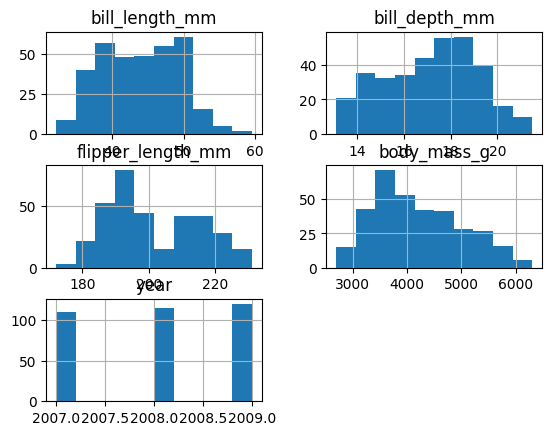

In [62]:
# Example of specific column histogram
# df['flipper_length_mm'].hist()
# plt.show()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

>#### Numerical Distribution Observations
>
>Bill Length (mm): Bimodal distribution with peaks around 40-45 mm and 50-55 mm.
>
>Bill Depth (mm): Slightly right-skewed, most data points between 15-19 mm, peaking around 17 mm.
>
>Flipper Length (mm): Bimodal distribution with peaks around 190 mm and 210 mm.
>
>Body Mass (g): Right-skewed, most data points between 3000-5000 g, peaking around 4000 g.
>
>Year: Evenly distributed across four years (2007, 2008, 2009, and 2010), indicating balanced data collection.

### Initial Data Distribution for Categorical Columns
Choose a categorical column and use df['column_name'].value_counts() to display the count of each category.
Use a loop to show the value counts for all categorical columns.

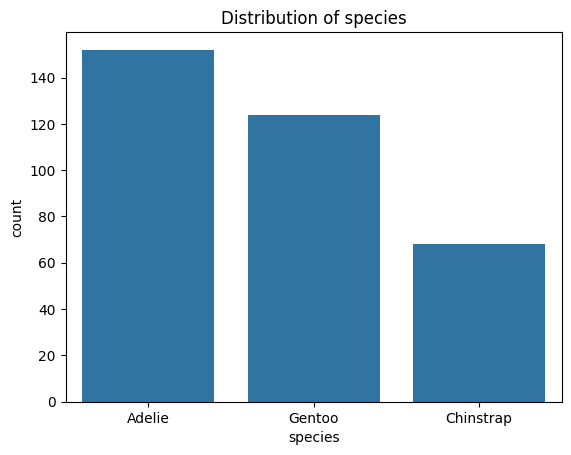

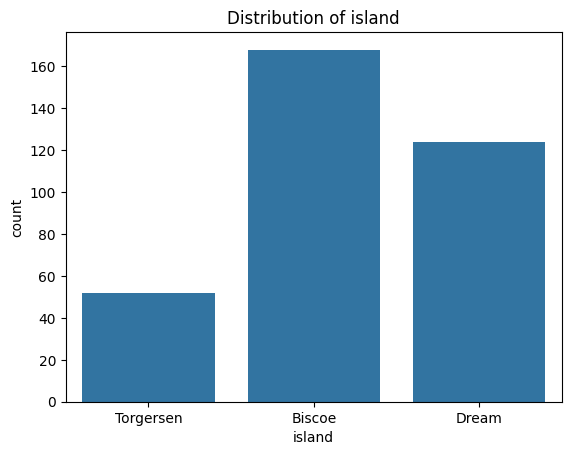

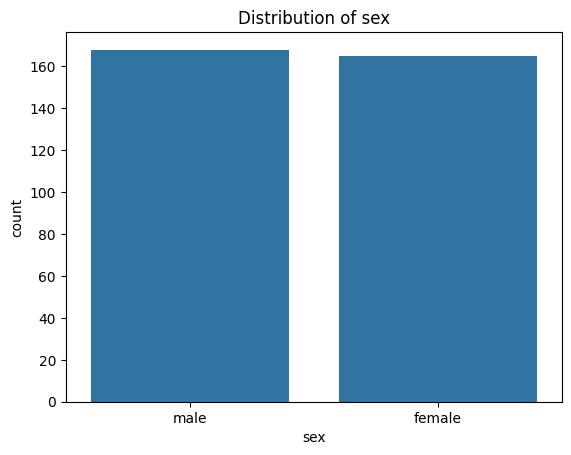

In [63]:
# example of specific column value counts
# df['species'].value_counts()
# plt.show()

# Loop
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

>#### Categorical Distribution Observations
>
>Species: Adelie is the most common species in this sample.
>
>Island: Biscoe Island has the highest penguin population.
>
>Sex: Male and female penguins are evenly distributed in this dataset. 🐧

### Initial Data Transformation and Feature Engineering
Data rarely comes in the format needed for optimal analysis.
Data Cleaning is about ensuring the quality and consistency of the data.
Data Transformation focuses on preparing the data for analysis.

In [64]:
# Renaming a columns to stand out
df.rename(columns={'species': 'SPECIES'}, inplace=True)
df.rename(columns={'island': 'ISLAND'}, inplace=True)
df.rename(columns={'sex': 'GENDER'}, inplace=True)
df.rename(columns={'year': 'YEAR'}, inplace=True)

# Adding new columns to convert metric units to imperial
df['bill_length_in'] = df['bill_length_mm'] / 25.4
df['bill_depth_in'] = df['bill_depth_mm'] / 25.4
df['flipper_length_in'] = df['flipper_length_mm'] / 25.4
df['body_mass_lbs'] = df['body_mass_g'] /  453.6

In [65]:
# verify above code was successful
print(df.head())

  SPECIES     ISLAND  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g  GENDER  YEAR  bill_length_in  bill_depth_in  \
0       3750.0    male  2007        1.539370       0.736220   
1       3800.0  female  2007        1.555118       0.685039   
2       3250.0  female  2007        1.586614       0.708661   
3          NaN     NaN  2007             NaN            NaN   
4       3450.0  female  2007        1.444882       0.759843   

   flipper_length_in  body_mass_lbs  
0           7.125984       8.267196  
1           7.322835       8.377425  
2           7.677165       7.164903  
3                NaN    

### Initial Visualizations
With the data in the right shape, using the features and columns in the desired format, the next step is to dive deeper into visualization.
This involves using more complex chart types to extract and present insights from the data.
For instance, pair plots from seaborn can be very useful for understanding relationships between all variables in a dataset.

### 1
**Goal:** Determine if body mass has any correlation to flipper length. Looking for strong linearity, clusters, and outliers. If a strong relationship is observed, flipper length might be used to predict body mass and vice versa. This can be useful for biological or ecological studies, like differentiating between species.

**Linear Model Plot:** tool to understand the relationship between variables, identify patterns, and assess the strength and direction of associations. They are particularly useful when investigating linear relationships and determining the predictive power of one variable on another.

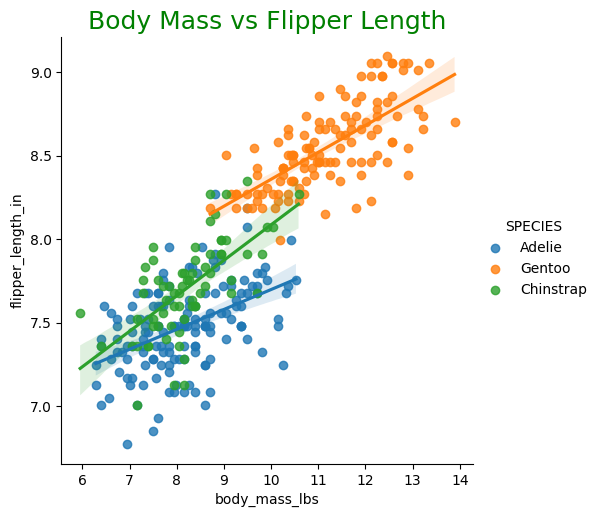

In [66]:
sns.lmplot(data= df, x="body_mass_lbs", y="flipper_length_in", hue="SPECIES")
plt.title("Body Mass vs Flipper Length", size=18, color="green")
plt.show()

>#### Scatterplot Observations
>
>There is a clear positive correlation between body mass and flipper length. As body mass increases, flipper length also tends to increase for all species.
>
>There is some overlap between the Adelie and Chinstrap species, especially in the mid-range of body mass and flipper length.
>
>The clear separation between species based on body mass and flipper length could indicate different ecological niches or adaptations.
>
>These characteristics combined could be useful for predicting the most likely species of an unknown penguin.

### 2
**Goal:** Provide insights into any differences or similarities in bill morphology across penguin species. Looking for central tendencies, spreads, and outliers. This can be useful for biological or ecological studies, like differentiating between species.

**Boxen Plot:** is a type of categorical plot used to display the distribution of a continuous variable within different categories. It is an extension of the traditional box plot, designed to provide a more detailed representation of the data distribution.


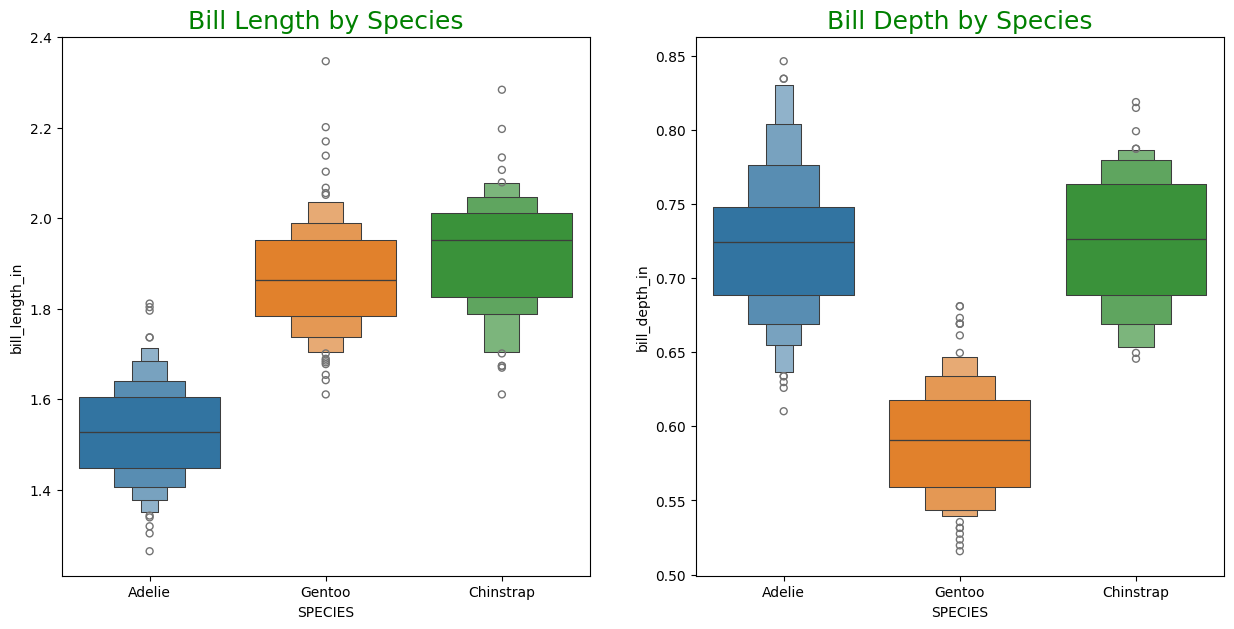

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

plt.figure(figsize=(7,7))

sns.boxenplot(
    y="bill_length_in",
    x="SPECIES",
    hue="SPECIES",
    data=df,
    ax=axes[0]
    )

axes[0].set_title('Bill Length by Species', size=18, color='green')

plt.figure(figsize=(7,7))
sns.boxenplot(
    y='bill_depth_in',
    x='SPECIES',
    hue='SPECIES',
    data=df, 
    ax=axes[1]
)
axes[1].set_title('Bill Depth by Species', size=18, color='green')
plt.show()

>#### Boxen Plot Observations
>
>Gentoo and Chinstrap penguins generally have longer bills compared to Adelie penguins.
>
>adeile and Chinstrap penguins generally have deeper bills compared to Gentoo penguins.
>
>Both charts include outliers represented as individual points outside of the whiskers.
>
>These bill measurements provide insights into penguin ecology, including feeding strategies, habitat preferences, and adaptations to their specific environments.

### 3
**Goal:** Identify the sex makeup of each island. Understanding gender distribution across islands can inform decisions related to habitat management, conservation efforts, and resource allocation. Ideally looking for a balance of sexes on each island.

**Heatmap:** tool that uses color to represent the values of a two-dimensional dataset. Each cell in the matrix displays a value through varying intensities of color, making it easy to spot patterns, correlations, and outliers within the data.

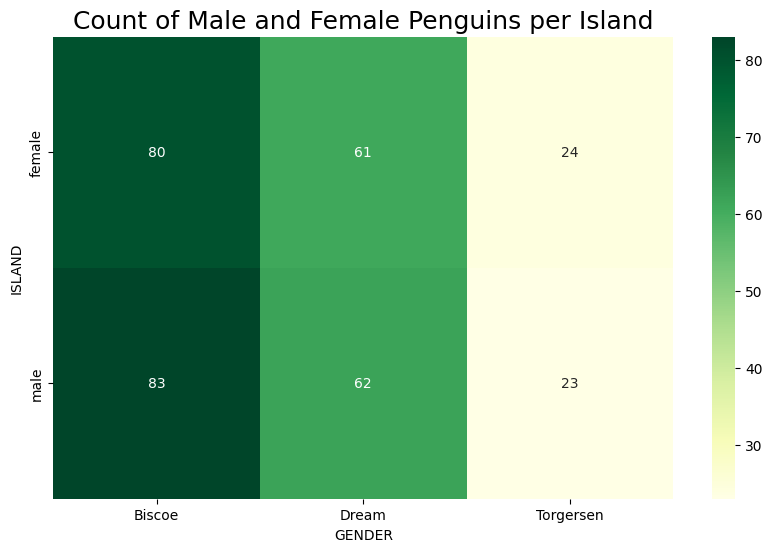

In [68]:
# Drop rows with missing values in 'sex' or 'island' columns
df = df.dropna(subset=['GENDER', 'ISLAND'])

# Create a crosstab to count the occurrences of each combination of island and sex
crosstab = pd.crosstab(df['GENDER'], df['ISLAND'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='YlGn', fmt='d')
plt.title('Count of Male and Female Penguins per Island', size=18)
plt.xlabel('GENDER')
plt.ylabel('ISLAND')
plt.show()

> #### Heatmap Observations
>
>Darker shades of green represent higher counts, while lighter shades represent lower counts.
>
>All three islands exhibit a relatively balanced gender distribution, indicating no significant gender bias in the populations on each island.
>
>The larger population on Biscoe Island might indicate more favorable living conditions or resources compared to Dream and Torgersen islands.

#### 4 Visualization of Penguin Populations
**Goal:** See if there are any distinct population changes on any of the islands over the years the data was collected.

**Count Plot:** tool that displays the frequency or count of observations within different categories or groups.They are most effective when dealing with discrete, non-numeric data.

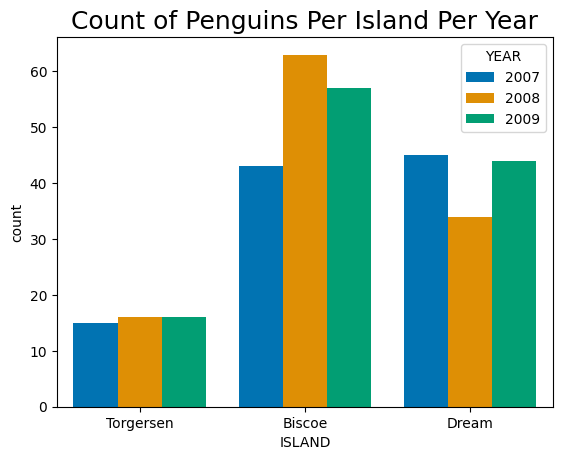

In [69]:
# Define a custom color palette
palette = 'colorblind'

sns.countplot(data=df, x="ISLAND", hue="YEAR", palette=palette, saturation=1)
plt.title('Count of Penguins Per Island Per Year', size=18)
plt.show()

>### Count Plot Observations
>
>Torgersen Island showed a mostly consistent penguin population over the three years.
>
>Biscoe Island consistently has the highest penguin count, while Torgersen Island has the lowest.
>
>Overall, 2008 had the highest penguin count across all islands.
>
>This data could be valuable for ecological studies, conservation efforts, and understanding habitat usage by wildlife.


#### 5 Just For Fun
**Goal:** See what I can do with a Joint Plot (scatterplot with marginal histograms). Will list any findings in the observation below!

**Joint Plot:** tool for visually assessing the relationship between two variables, including the presence of correlation, clusters, or other patterns. They provide both a detailed view of the joint distribution of the variables and insights into their individual distributions.

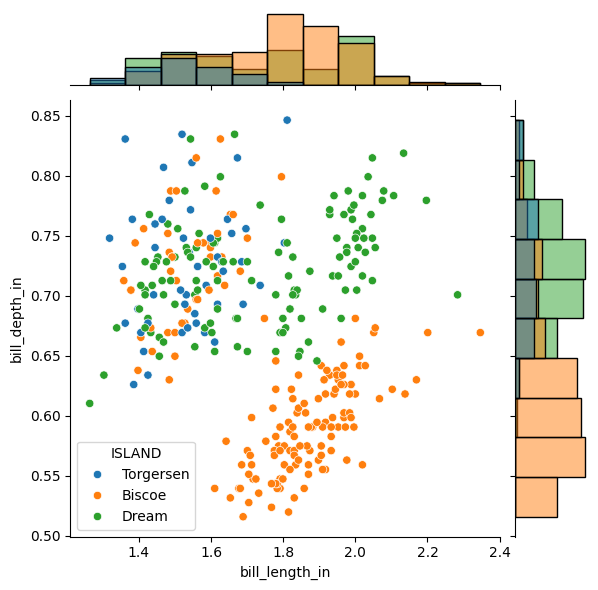

In [70]:
g = sns.JointGrid(data=df, x="bill_length_in", y="bill_depth_in", hue="ISLAND")
g.plot(sns.scatterplot, sns.histplot)
plt.show()

>### Joint Plot Observations
>
>This chart provides insights into the relationship between bill length, bill depth, and island categories for penguins.
>
>The median bill depth is highest for Biscoe Island penguins.
>
>Torgersen Island penguins have the widest range of bill depths (indicated by the whiskers).
>
>Dream Island penguins have a relatively consistent bill depth (narrower interquartile range).